<center><h1>Proyecto final</h1></center>
<center><h3>IBM SkillsBuild Europa - Análisis de datos</h3></center>

# Requisitos



* Conocimientos de Python, Power BI o Tableau.
* Comprensión de la limpieza de datos.
* Comprensión de la visualización de datos.



#### Nivel de ejercicio: Intermedio



#### Duración: aproximadamente 3 horas


### Análisis de datos de Airbnb:



#### Objetivo:



En este ejercicio, practicarás el análisis de datos sobre un conjunto de datos abiertos procedentes de Airbnb. Algunas de las tareas incluyen:

- limpieza de datos,
- transformación de datos y
- visualización de datos.



#### Resumen sobre los datos de Airbnb:



Los criterios principales de la gente cuando visita lugares nuevos son contar con alojamiento y comida a precios razonables. Airbnb (Air-Bed-Breakfast) es un mercado en línea creado para satisfacer esta necesidad, pues permite a la gente alquilar sus casas durante plazos cortos. Estos servicios se ofrecen a un precio relativamente inferior al de los hoteles y en diversas ubicaciones geográficas. Además, personas de todo el mundo prefieren el servicio hogareño y económico.



#### Fuente de los datos



Puedes obtener el <i>dataset</i> para realizar este proyecto en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata



Este <i>dataset</i> contiene información sobre los alojamientos, tal como el barrio, el tipo de habitación, el precio, la disponibilidad, las opiniones, los gastos de servicio, la política de cancelación y las normas de uso de la casa.



¡Te deseamos lo mejor en tu análisis de los datos de Airbnb!

## Tarea 1: Carga de datos (Python)



1. Lee el fichero csv y cárgarlo en un <i>dataframe</i> de pandas.
2. Visualiza las cinco primeras filas de tu <i>dataframe</i>.
3. Visualize los tipos de datos de las columnas.

In [332]:
import pandas as pd
ruta_del_fichero = '/media/sf_Python_(Atrium)/IBM python/Airbnb_Open_Data.csv'
dataframe = pd.read_csv(ruta_del_fichero, dtype=str)

In [333]:
print("5 primeras filas:")
print(dataframe.head())

5 primeras filas:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat       long        country  ... service fee minimum nights  \
0  40.64749  

In [334]:
print("Tipos de datos:")
print(dataframe.dtypes)

Tipos de datos:
id                                object
NAME                              object
host id                           object
host_identity_verified            object
host name                         object
neighbourhood group               object
neighbourhood                     object
lat                               object
long                              object
country                           object
country code                      object
instant_bookable                  object
cancellation_policy               object
room type                         object
Construction year                 object
price                             object
service fee                       object
minimum nights                    object
number of reviews                 object
last review                       object
reviews per month                 object
review rate number                object
calculated host listings count    object
availability 365                  object


## Tarea 2a: Limpieza de datos (cualquier herramienta)


1. Elimina las columnas no deseadas del <i>dataframe</i>, entre ellas se incluyen `host id`, `id`, `country` y `country code`.
2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos.


Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla tomadas antes y después de eliminar las columnas.

In [335]:
import pandas as pd
ruta_del_fichero = '/media/sf_Python_(Atrium)/IBM python/Airbnb_Open_Data.csv'
dataframe = pd.read_csv(ruta_del_fichero, dtype=str)
columnas_no_deseadas = ['host id', 'id', 'country', 'country code']
dataframe = dataframe.drop(columnas_no_deseadas, axis=1)
print("5 primeras filas tras eliminar las columnas:")
print(dataframe.head())

5 primeras filas tras eliminar las columnas:
                                               NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat       long  \
0  Madaline            Brooklyn    Kensington  40.64749  -73.97237   
1     Jenna           Manhattan       Midtown  40.75362  -73.98377   
2     Elise           Manhattan        Harlem  40.80902   -73.9419   
3     Garry            Brooklyn  Clinton Hill  40.68514  -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851  -73.94399   

  instant_bookable cancellation_policy        room type  ... serv

In [336]:
## Se eliminan por privacidad y por redundancia entre ellas 

## Tarea 2b: Limpieza de datos (Python)


- Compueba si hay valores nulos y muestra el recuento en orden ascendente. **Si faltan valores, imputa los valores como consideres.**
- Comprueba si hay valores duplicados y elimínalos.
- Muestra el número total de registros antes y después de eliminar los duplicados.

In [337]:
import pandas as pd
ruta_del_fichero = '/media/sf_Python_(Atrium)/IBM python/Airbnb_Open_Data.csv'
dataframe = pd.read_csv(ruta_del_fichero, dtype=str)
## Eliminar
columnas_no_deseadas = ['host id', 'id', 'country', 'country code']
dataframe = dataframe.drop(columnas_no_deseadas, axis=1)
print("5 primeras filas tras eliminar las columnas:")
print(dataframe.head())
## Valores nulos
valores_nulos = dataframe.isnull().sum().sort_values(ascending=True)
print("Valores nulos, orden ascendente:")
print(valores_nulos)
for columna in dataframe.columns:
    if dataframe[columna].dtype == 'float64' or dataframe[columna].dtype == 'int64':
        dataframe[columna] = dataframe[columna].fillna(dataframe[columna].mean())

5 primeras filas tras eliminar las columnas:
                                               NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat       long  \
0  Madaline            Brooklyn    Kensington  40.64749  -73.97237   
1     Jenna           Manhattan       Midtown  40.75362  -73.98377   
2     Elise           Manhattan        Harlem  40.80902   -73.9419   
3     Garry            Brooklyn  Clinton Hill  40.68514  -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851  -73.94399   

  instant_bookable cancellation_policy        room type  ... serv

In [338]:
registros_antes = len(dataframe)
dataframe_sin_duplicados = dataframe.drop_duplicates()
registros_despues = len(dataframe_sin_duplicados)

In [339]:
print(f"Registros antes de eliminar duplicados: {str(registros_antes)}")
print(f"Registros tras eliminar duplicados: {str(registros_despues)}")

Registros antes de eliminar duplicados: 102599
Registros tras eliminar duplicados: 99163


## Tarea 3: Transformación de datos (cualquier herramienta)





- Cambia el nombre de la columna `availability 365` a `days_booked`.
- Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".
- Elimina el signo de dólares y la coma de las columnas `price` y `service_fee`. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [340]:
dataframe.rename(columns={'availability 365': 'days_booked'}, inplace=True)

In [341]:
dataframe.columns = dataframe.columns.str.lower().str.replace(' ', '_')

In [342]:
dataframe['price'] = dataframe['price'].replace('[\$,]', '', regex=True).astype(float)
dataframe['service_fee'] = dataframe['service_fee'].replace('[\$,]', '', regex=True).astype(float)
print("Primeras filas del dataframe después de las transformaciones:")
print(dataframe.head())

Primeras filas del dataframe después de las transformaciones:
                                               name host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host_name neighbourhood_group neighbourhood       lat       long  \
0  Madaline            Brooklyn    Kensington  40.64749  -73.97237   
1     Jenna           Manhattan       Midtown  40.75362  -73.98377   
2     Elise           Manhattan        Harlem  40.80902   -73.9419   
3     Garry            Brooklyn  Clinton Hill  40.68514  -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851  -73.94399   

  instant_bookable cancellation_policy        ro

### Tarea 4: Análisis exploratorio de datos (cualquier herramienta)



- Enumera los tipos de habitaciones disponibles en el <i>dataset</i>.
- ¿Qué tipo de habitación tiene la política de cancelación más estricta?
- Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [343]:
tipos_de_habitaciones = dataframe['room_type'].unique()
print("Tipos de habitaciones disponibles:")
print(tipos_de_habitaciones)

Tipos de habitaciones disponibles:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [344]:
habitacion_mas_estricta = dataframe.groupby('room_type')['cancellation_policy'].apply(lambda x: x.value_counts().idxmax()).idxmax()
print(f"El tipo de habitación con la política de cancelación más estricta es: {habitacion_mas_estricta}")

El tipo de habitación con la política de cancelación más estricta es: Entire home/apt


In [345]:
precio_medio_por_barrio = dataframe.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
barrios_mas_caros = precio_medio_por_barrio.idxmax()

print("Precio medio por barrio:")
print(precio_medio_por_barrio)
print(f"\nEl conjunto de barrios más caro para alquilar es: {barrios_mas_caros}")

Precio medio por barrio:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
                             ...     
Richmondtown               373.400000
Breezy Point               309.888889
Rossville                  300.666667
Spuyten Duyvil             293.444444
Lighthouse Hill            107.666667
Name: price, Length: 224, dtype: float64

El conjunto de barrios más caro para alquilar es: New Dorp


## Tarea 5a: Visualización de datos (Cualquier herramienta)

* Enumerar los distintos tipos de habitaciones disponibles en Airnb
* Qué tipo de habitación se adhiere a una política de cancelación más estricta.
* Enumere los precios por grupo de barrios y mencione también cuál es el grupo de barrios más caro para los alquileres.
* Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?
* Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras
* Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
* Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya pantallazos de su trabajo.

In [346]:
tipos_de_habitaciones = dataframe['room_type'].unique()
print("Tipos de habitaciones disponibles en Airbnb:")
print(tipos_de_habitaciones)

Tipos de habitaciones disponibles en Airbnb:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [347]:
habitacion_mas_estricta = dataframe.groupby('room_type')['cancellation_policy'].apply(lambda x: x.value_counts().idxmax()).idxmax()
print(f"El tipo de habitación con la política de cancelación más estricta es: {habitacion_mas_estricta}")

El tipo de habitación con la política de cancelación más estricta es: Entire home/apt


In [348]:
precios_por_barrio = dataframe.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
barrio_mas_caro = precios_por_barrio.idxmax()

print("Precio medio por barrio:")
print(precios_por_barrio)
print(f"\nEl grupo de barrios más caro para alquileres es: {barrio_mas_caro}")

Precio medio por barrio:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
                             ...     
Richmondtown               373.400000
Breezy Point               309.888889
Rossville                  300.666667
Spuyten Duyvil             293.444444
Lighthouse Hill            107.666667
Name: price, Length: 224, dtype: float64

El grupo de barrios más caro para alquileres es: New Dorp


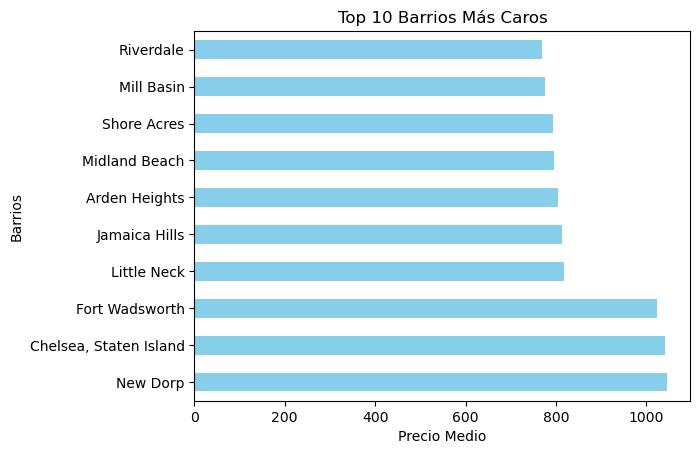

El barrio más barato es: Lighthouse Hill


In [349]:
import matplotlib.pyplot as plt

barrios_mas_caros = precios_por_barrio.head(10)
barrios_mas_caros.plot(kind='barh', color='skyblue')
plt.xlabel('Precio Medio')
plt.ylabel('Barrios')
plt.title('Top 10 Barrios Más Caros')
plt.show()

barrio_mas_barato = precios_por_barrio.idxmin()
print(f"El barrio más barato es: {barrio_mas_barato}")

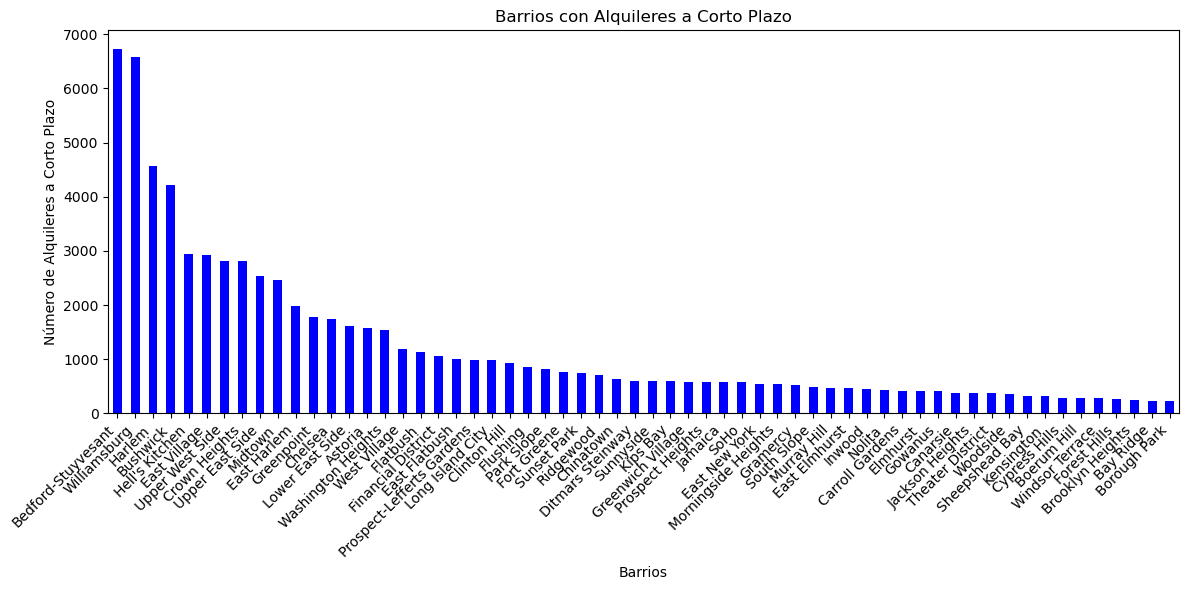

In [350]:
dataframe['minimum_nights'] = pd.to_numeric(dataframe['minimum_nights'], errors='coerce')
alquileres_corto_plazo = dataframe[dataframe['minimum_nights'] < 10]
barrios_alquiler_corto_plazo = alquileres_corto_plazo['neighbourhood'].value_counts()

barrios_menos_alquileres = barrios_alquiler_corto_plazo.head(60)
# reduzco para mostrar los barrios con más alquileres
# a corto plazo porque el gráfico no era legible...

plt.figure(figsize=(12, 6))
barrios_menos_alquileres.plot(kind='bar', color='blue')
plt.xlabel('Barrios')
plt.ylabel('Número de Alquileres a Corto Plazo')
plt.title('Barrios con Alquileres a Corto Plazo')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

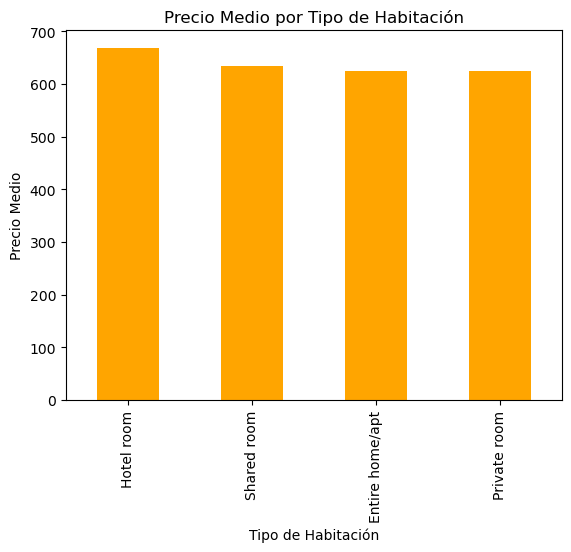

In [351]:
precios_por_tipo_habitacion = dataframe.groupby('room_type')['price'].mean().sort_values(ascending=False)

precios_por_tipo_habitacion.plot(kind='bar', color='orange')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Medio')
plt.title('Precio Medio por Tipo de Habitación')
plt.show()

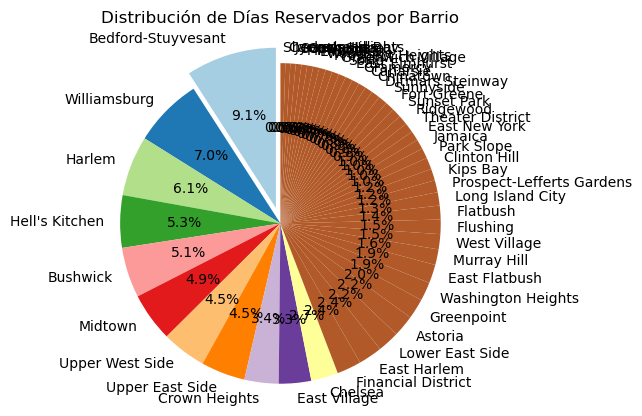

In [352]:
dataframe['days_booked'] = pd.to_numeric(dataframe['days_booked'], errors='coerce')

dias_reservados_por_barrio = dataframe.groupby('neighbourhood')['days_booked'].sum()
dias_reservados_por_barrio = dias_reservados_por_barrio.sort_values(ascending=False).head(50)

colors = plt.cm.Paired(range(len(dias_reservados_por_barrio)))
explode = [0.1 if i == 0 else 0 for i in range(len(dias_reservados_por_barrio))]

plt.pie(dias_reservados_por_barrio, labels=dias_reservados_por_barrio.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode)
plt.axis('equal')
plt.title('Distribución de Días Reservados por Barrio')
plt.show()

## Tarea 5b: Visualización de datos (Cualquier herramienta)

* ¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un gráfico de dispersión e indique sus inferencias
* Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.

Si utiliza Python para este ejercicio, incluya el código en las celdas siguientes. Si utiliza cualquier otra herramienta, incluya capturas de pantalla de su trabajo.

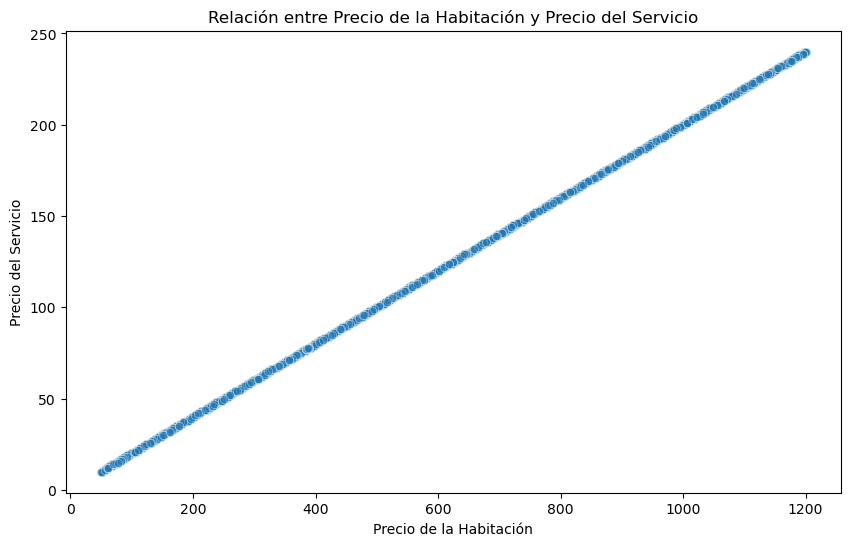

In [353]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='service_fee', data=dataframe, alpha=0.5)
plt.title('Relación entre Precio de la Habitación y Precio del Servicio')
plt.xlabel('Precio de la Habitación')
plt.ylabel('Precio del Servicio')
plt.show()

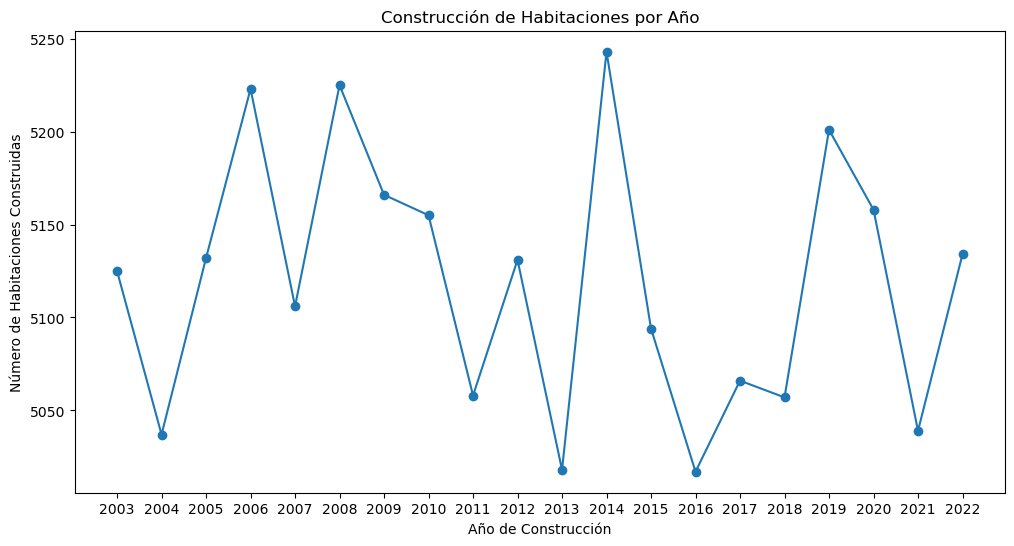

In [355]:
construction = dataframe.groupby('construction_year').size()

plt.figure(figsize=(12, 6))
plt.plot(construction.index.to_numpy(), construction.values, marker='o')
plt.title('Construcción de Habitaciones por Año')
plt.xlabel('Año de Construcción')
plt.ylabel('Número de Habitaciones Construidas')
plt.show()

## Tarea 5c: Visualización de datos (Cualquier herramienta)

* Con la ayuda de gráficos de caja ilustra lo siguiente
 * Efecto del número de tasa de revisión en el precio
 * Efecto de la identidad del host verificada en el precio

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya capturas de pantalla de su trabajo.

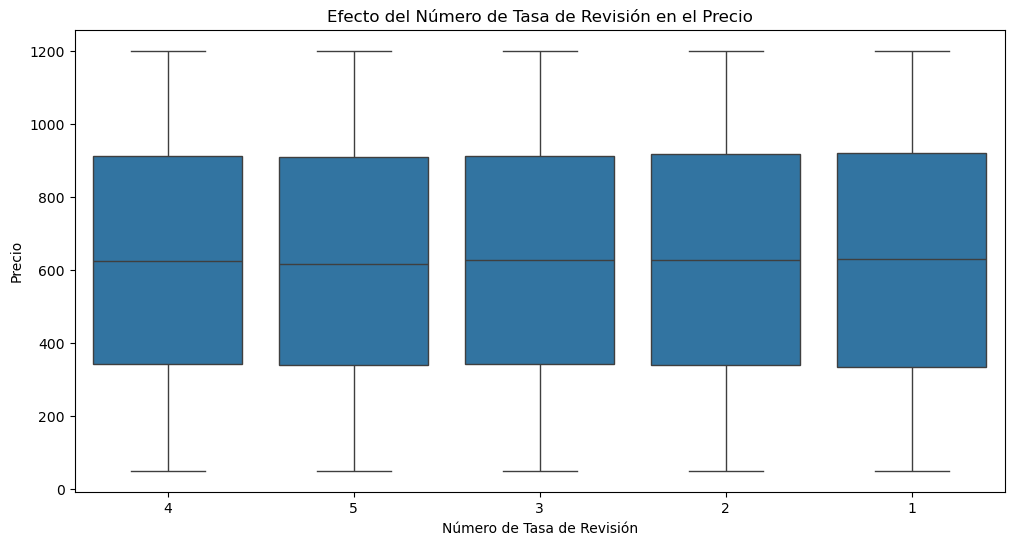

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_rate_number', y='price', data=dataframe)
plt.title('Efecto del Número de Tasa de Revisión en el Precio')
plt.xlabel('Número de Tasa de Revisión')
plt.ylabel('Precio')
plt.show()

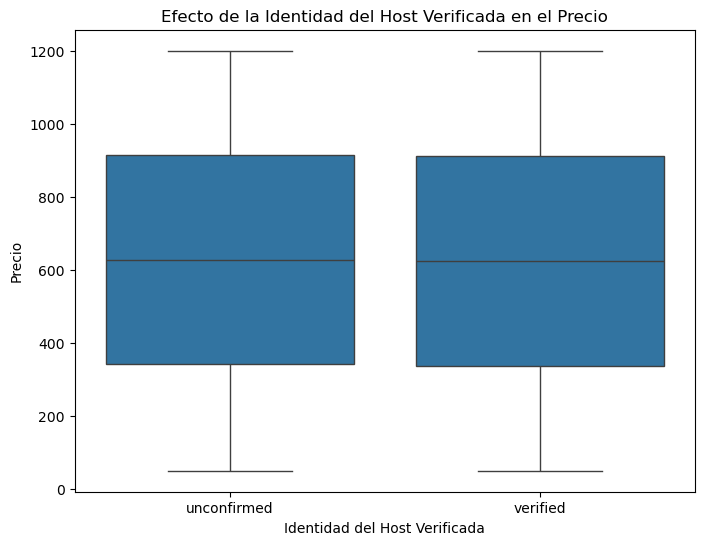

In [357]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_identity_verified', y='price', data=dataframe)
plt.title('Efecto de la Identidad del Host Verificada en el Precio')
plt.xlabel('Identidad del Host Verificada')
plt.ylabel('Precio')
plt.show()